In [1]:
# Setup for Google Colab (optional)
import sys
if 'google.colab' in sys.modules:
    print("Running in Google Colab")
    # Install required packages
    !pip install -q scikit-image matplotlib numpy scipy pillow
    
    # Set up file handling
    from google.colab import files
    print("Colab setup complete.")
else:
    print("Running in local environment")

Running in local environment


<a href="https://colab.research.google.com/github/NU-MSE-LECTURES/465-WINTER2026/blob/main/Week_03/code_examples/example_04_histogram_equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 03 Example 4: Histogram Equalization and Contrast Enhancement

This notebook demonstrates histogram equalization and related contrast enhancement techniques.
We'll work with standard test images to clearly show the contrast improvement effects.

## Overview: Why Histogram Equalization?

### The Problem:
- Many images have poor contrast (most pixels concentrated in narrow intensity range)
- Wastes available dynamic range of display
- Fine details become invisible

### The Solution - Histogram Equalization:
- Redistributes pixel intensities across full range
- Stretches underutilized intensity regions
- Improves visibility of subtle features

### Key Concepts:
- **Histogram**: Distribution of pixel intensities
- **CDF (Cumulative Distribution Function)**: Used to compute mapping
- **Adaptive Histogram Equalization**: Local version for better results

### Application in STEM:
- Enhanced visibility of atomic columns
- Better phase contrast in crystalline materials
- Improved segmentation in image analysis

## 1. Load Test Images

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, exposure

# Available test images
test_images = {
    "Cameraman": data.camera(),
    "Coins": data.coins(),
    "Astronaut": data.astronaut()[:, :, 0],  # Convert to grayscale
    "Moon": data.moon(),
}

# Select which image to use (change this to switch)
selected_image = "Cameraman"
image_original = test_images[selected_image]

print(f"Available test images:")
for name in test_images.keys():
    print(f"  - {name}")
print(f"\nSelected: {selected_image}")
print(f"\nImage information:")
print(f"  Shape: {image_original.shape}")
print(f"  Data type: {image_original.dtype}")
print(f"  Value range: [{image_original.min()}, {image_original.max()}]")
print(f"  Mean: {image_original.mean():.2f}, Std: {image_original.std():.2f}")

Available test images:
  - Cameraman
  - Coins
  - Astronaut
  - Moon

Selected: Cameraman

Image information:
  Shape: (512, 512)
  Data type: uint8
  Value range: [0, 255]
  Mean: 129.06, Std: 73.64


## 2. Analyze Original Histogram

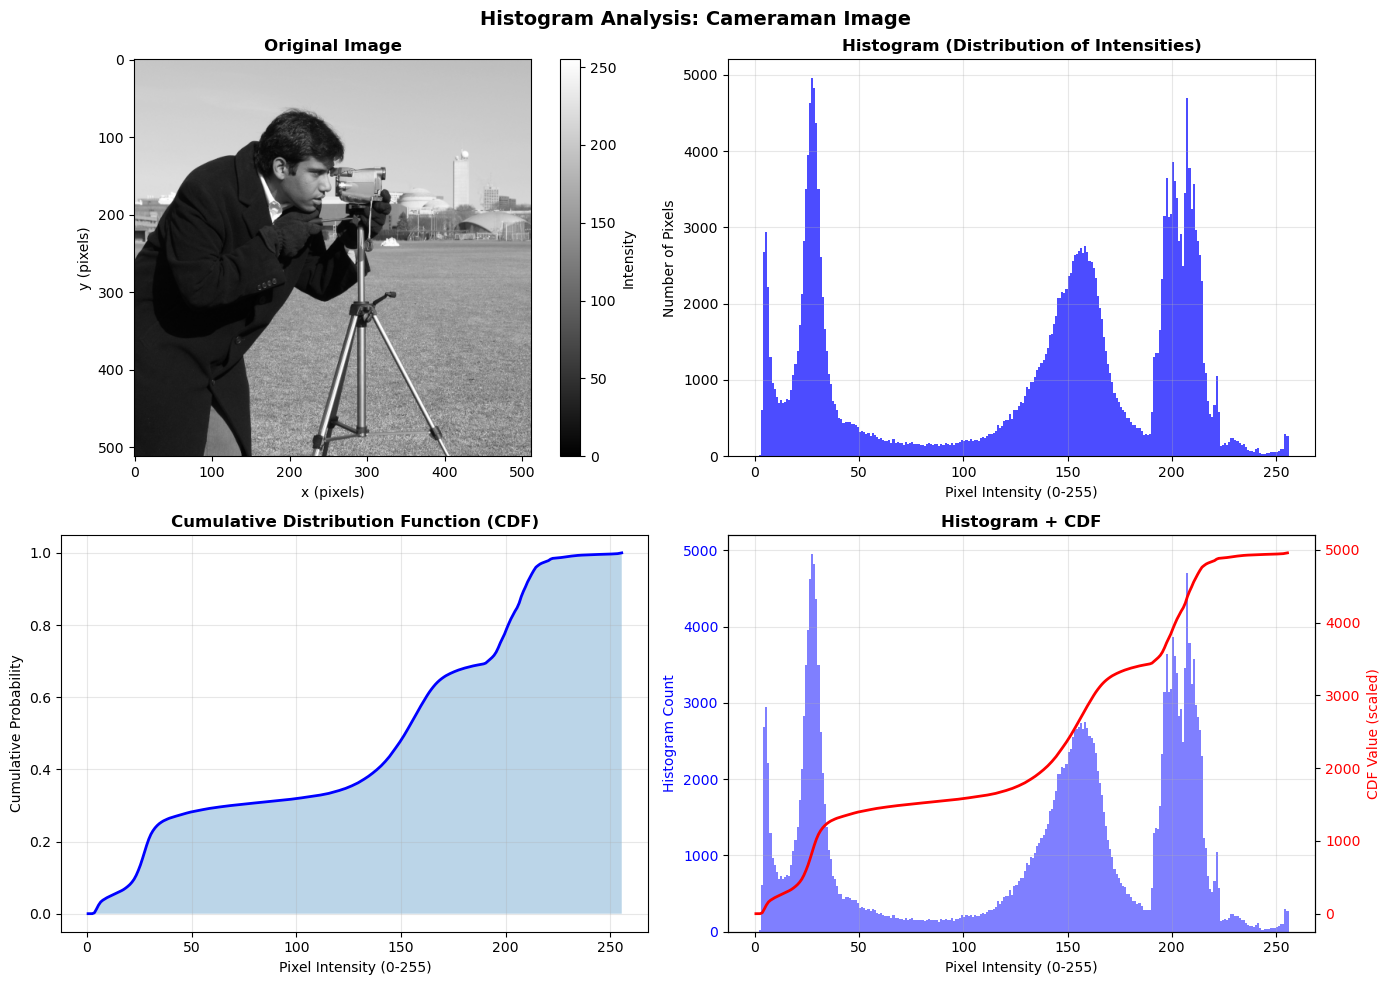


Histogram Analysis:
  Total pixels: 262144
  Used intensity range: 0 - 255
  Unused range: 0 intensity levels


In [3]:
# Compute histogram
histogram, bin_edges = np.histogram(image_original.flatten(), bins=256, range=(0, 256))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Compute cumulative distribution function
cdf = histogram.cumsum()
cdf_normalized = cdf / cdf[-1]  # Normalize to [0, 1]

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(f'Histogram Analysis: {selected_image} Image', fontsize=14, fontweight='bold')

# Original image
im0 = axes[0, 0].imshow(image_original, cmap='gray')
axes[0, 0].set_title('Original Image', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('x (pixels)')
axes[0, 0].set_ylabel('y (pixels)')
plt.colorbar(im0, ax=axes[0, 0], label='Intensity')

# Histogram
axes[0, 1].bar(bin_centers, histogram, width=1.0, color='blue', alpha=0.7, edgecolor='none')
axes[0, 1].set_title('Histogram (Distribution of Intensities)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Pixel Intensity (0-255)')
axes[0, 1].set_ylabel('Number of Pixels')
axes[0, 1].grid(alpha=0.3)

# CDF
axes[1, 0].plot(bin_centers, cdf_normalized, 'b-', linewidth=2)
axes[1, 0].fill_between(bin_centers, cdf_normalized, alpha=0.3)
axes[1, 0].set_title('Cumulative Distribution Function (CDF)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Pixel Intensity (0-255)')
axes[1, 0].set_ylabel('Cumulative Probability')
axes[1, 0].grid(alpha=0.3)

# Histogram + CDF combined
ax_hist = axes[1, 1]
ax_cdf = ax_hist.twinx()

ax_hist.bar(bin_centers, histogram, width=1.0, color='blue', alpha=0.5, label='Histogram', edgecolor='none')
ax_cdf.plot(bin_centers, cdf_normalized * histogram.max(), 'r-', linewidth=2, label='CDF (scaled)')

ax_hist.set_title('Histogram + CDF', fontsize=12, fontweight='bold')
ax_hist.set_xlabel('Pixel Intensity (0-255)')
ax_hist.set_ylabel('Histogram Count', color='blue')
ax_cdf.set_ylabel('CDF Value (scaled)', color='red')
ax_hist.tick_params(axis='y', labelcolor='blue')
ax_cdf.tick_params(axis='y', labelcolor='red')
ax_hist.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nHistogram Analysis:")
print(f"  Total pixels: {histogram.sum()}")
print(f"  Used intensity range: {np.min(np.where(histogram > 0))} - {np.max(np.where(histogram > 0))}")
print(f"  Unused range: {256 - (np.max(np.where(histogram > 0)) - np.min(np.where(histogram > 0)) + 1)} intensity levels")

## 3. Apply Histogram Equalization

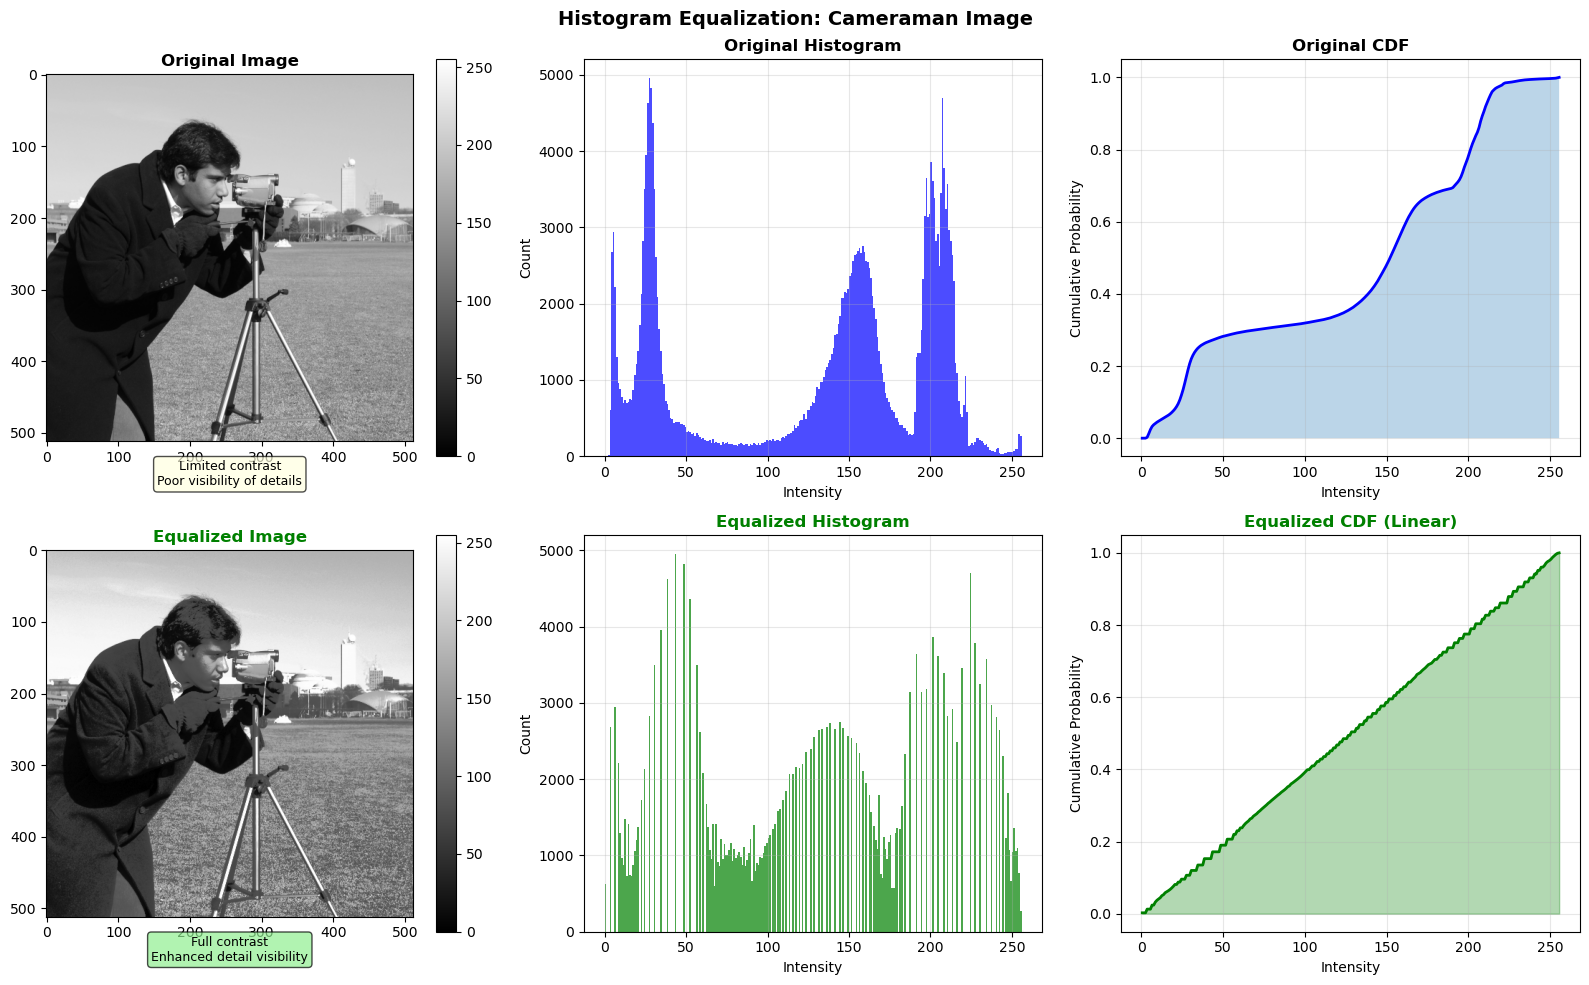


Histogram Equalization Result:
✓ Histogram becomes approximately flat (uniform distribution)
✓ CDF becomes linear
✓ Uses full intensity range [0, 255]
✓ Enhanced contrast reveals hidden details


In [4]:
# Histogram equalization
image_equalized = exposure.equalize_hist(image_original)
image_equalized_int = (image_equalized * 255).astype(np.uint8)

# Compute histogram of equalized image
histogram_eq, _ = np.histogram(image_equalized_int.flatten(), bins=256, range=(0, 256))
cdf_eq = histogram_eq.cumsum()
cdf_eq_normalized = cdf_eq / cdf_eq[-1]

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle(f'Histogram Equalization: {selected_image} Image', fontsize=14, fontweight='bold')

# Row 1: Original
im0 = axes[0, 0].imshow(image_original, cmap='gray')
axes[0, 0].set_title('Original Image', fontsize=12, fontweight='bold')
axes[0, 0].text(0.5, -0.12, 'Limited contrast\nPoor visibility of details', 
                transform=axes[0, 0].transAxes, ha='center', fontsize=9,
                bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))
plt.colorbar(im0, ax=axes[0, 0])

axes[0, 1].bar(bin_centers, histogram, width=1.0, color='blue', alpha=0.7, edgecolor='none')
axes[0, 1].set_title('Original Histogram', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Intensity')
axes[0, 1].set_ylabel('Count')
axes[0, 1].grid(alpha=0.3)

axes[0, 2].plot(bin_centers, cdf_normalized, 'b-', linewidth=2)
axes[0, 2].fill_between(bin_centers, cdf_normalized, alpha=0.3)
axes[0, 2].set_title('Original CDF', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Intensity')
axes[0, 2].set_ylabel('Cumulative Probability')
axes[0, 2].grid(alpha=0.3)

# Row 2: Equalized
im1 = axes[1, 0].imshow(image_equalized_int, cmap='gray')
axes[1, 0].set_title('Equalized Image', fontsize=12, fontweight='bold', color='green')
axes[1, 0].text(0.5, -0.12, 'Full contrast\nEnhanced detail visibility', 
                transform=axes[1, 0].transAxes, ha='center', fontsize=9,
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
plt.colorbar(im1, ax=axes[1, 0])

axes[1, 1].bar(bin_centers, histogram_eq, width=1.0, color='green', alpha=0.7, edgecolor='none')
axes[1, 1].set_title('Equalized Histogram', fontsize=12, fontweight='bold', color='green')
axes[1, 1].set_xlabel('Intensity')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(alpha=0.3)

axes[1, 2].plot(bin_centers, cdf_eq_normalized, 'g-', linewidth=2)
axes[1, 2].fill_between(bin_centers, cdf_eq_normalized, alpha=0.3, color='green')
axes[1, 2].set_title('Equalized CDF (Linear)', fontsize=12, fontweight='bold', color='green')
axes[1, 2].set_xlabel('Intensity')
axes[1, 2].set_ylabel('Cumulative Probability')
axes[1, 2].grid(alpha=0.3)

for ax in axes.flat:
    if hasattr(ax, 'set_xlabel'):
        pass  # Already labeled

plt.tight_layout()
plt.show()

print("\nHistogram Equalization Result:")
print("✓ Histogram becomes approximately flat (uniform distribution)")
print("✓ CDF becomes linear")
print("✓ Uses full intensity range [0, 255]")
print("✓ Enhanced contrast reveals hidden details")

## 4. Adaptive Histogram Equalization (CLAHE)

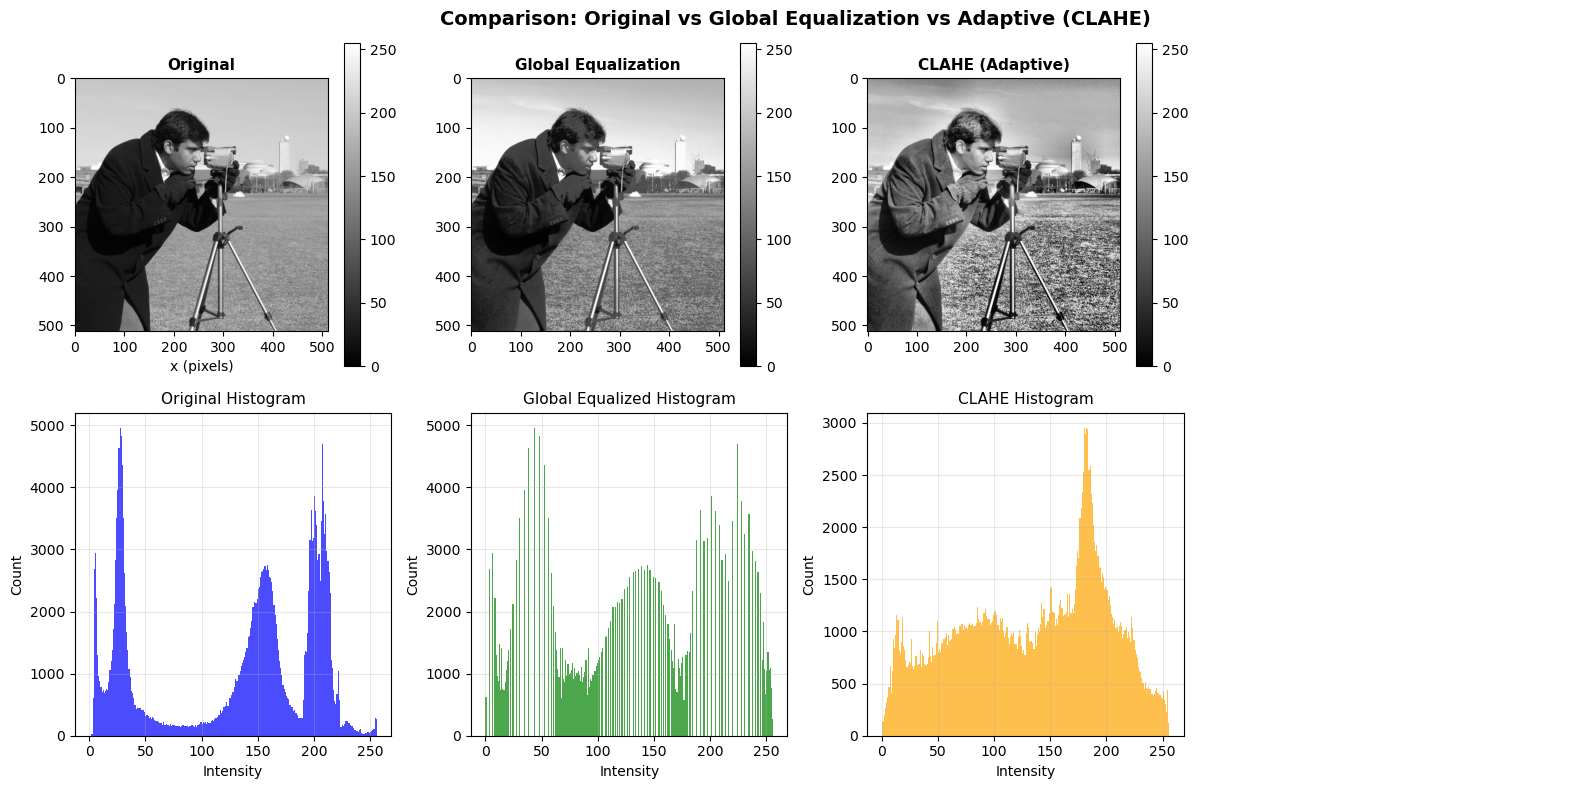


Method Comparison:

Global Histogram Equalization:
  ✓ Fully uses intensity range
  ✓ Simple to understand
  ✗ Can create artifacts (overly enhanced noise)
  ✗ May not preserve natural appearance

Adaptive Histogram Equalization (CLAHE):
  ✓ Improves local contrast
  ✓ Better preserves image appearance
  ✓ Reduces noise artifacts
  ✗ Computationally more expensive
  ✗ Requires parameter tuning (clip_limit)


In [6]:
# Adaptive Histogram Equalization (CLAHE - Contrast Limited Adaptive Histogram Equalization)
image_clahe = exposure.equalize_adapthist(image_original, clip_limit=0.03)
image_clahe_int = (image_clahe * 255).astype(np.uint8)

# Comparison visualization
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Comparison: Original vs Global Equalization vs Adaptive (CLAHE)', fontsize=14, fontweight='bold')

# Row 1: Full images
im0 = axes[0, 0].imshow(image_original, cmap='gray')
axes[0, 0].set_title('Original', fontsize=11, fontweight='bold')
plt.colorbar(im0, ax=axes[0, 0])

im1 = axes[0, 1].imshow(image_equalized_int, cmap='gray')
axes[0, 1].set_title('Global Equalization', fontsize=11, fontweight='bold')
plt.colorbar(im1, ax=axes[0, 1])

im2 = axes[0, 2].imshow(image_clahe_int, cmap='gray')
axes[0, 2].set_title('CLAHE (Adaptive)', fontsize=11, fontweight='bold')
plt.colorbar(im2, ax=axes[0, 2])

axes[0, 3].axis('off')

# Row 2: Histograms
hist_original, _ = np.histogram(image_original.flatten(), bins=256, range=(0, 256))
hist_clahe, _ = np.histogram(image_clahe_int.flatten(), bins=256, range=(0, 256))

axes[1, 0].bar(bin_centers, hist_original, width=1.0, color='blue', alpha=0.7, edgecolor='none')
axes[1, 0].set_title('Original Histogram', fontsize=11)
axes[1, 0].set_xlabel('Intensity')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(alpha=0.3)

axes[1, 1].bar(bin_centers, histogram_eq, width=1.0, color='green', alpha=0.7, edgecolor='none')
axes[1, 1].set_title('Global Equalized Histogram', fontsize=11)
axes[1, 1].set_xlabel('Intensity')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(alpha=0.3)

axes[1, 2].bar(bin_centers, hist_clahe, width=1.0, color='orange', alpha=0.7, edgecolor='none')
axes[1, 2].set_title('CLAHE Histogram', fontsize=11)
axes[1, 2].set_xlabel('Intensity')
axes[1, 2].set_ylabel('Count')
axes[1, 2].grid(alpha=0.3)

axes[1, 3].axis('off')

for ax in axes.flat:
    ax.set_xlabel('x (pixels)' if ax == axes[0, 0] else (ax.get_xlabel() if hasattr(ax, 'get_xlabel') else ''))

plt.tight_layout()
plt.show()

print("\nMethod Comparison:")
print("\nGlobal Histogram Equalization:")
print("  ✓ Fully uses intensity range")
print("  ✓ Simple to understand")
print("  ✗ Can create artifacts (overly enhanced noise)")
print("  ✗ May not preserve natural appearance")

print("\nAdaptive Histogram Equalization (CLAHE):")
print("  ✓ Improves local contrast")
print("  ✓ Better preserves image appearance")
print("  ✓ Reduces noise artifacts")
print("  ✗ Computationally more expensive")
print("  ✗ Requires parameter tuning (clip_limit)")

## 5. Close-up Comparison

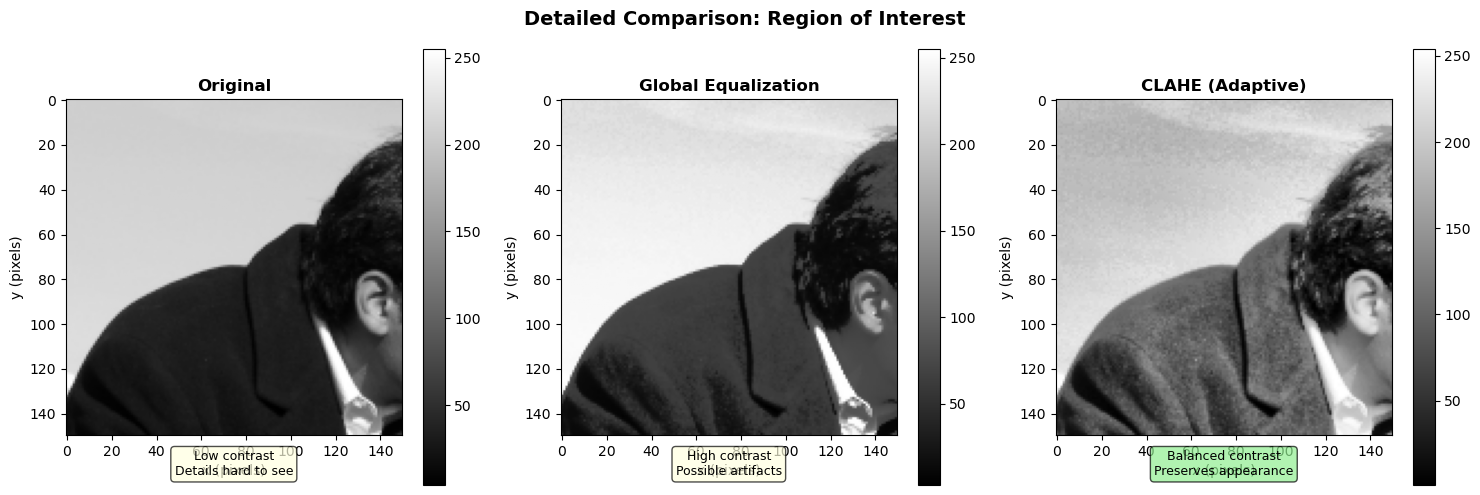

In [7]:
# Extract ROI for detailed comparison
roi_y = slice(50, 200)
roi_x = slice(50, 200)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Detailed Comparison: Region of Interest', fontsize=14, fontweight='bold')

im0 = axes[0].imshow(image_original[roi_y, roi_x], cmap='gray')
axes[0].set_title('Original', fontsize=12, fontweight='bold')
axes[0].text(0.5, -0.12, 'Low contrast\nDetails hard to see', 
            transform=axes[0].transAxes, ha='center', fontsize=9,
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))
plt.colorbar(im0, ax=axes[0])

im1 = axes[1].imshow(image_equalized_int[roi_y, roi_x], cmap='gray')
axes[1].set_title('Global Equalization', fontsize=12, fontweight='bold')
axes[1].text(0.5, -0.12, 'High contrast\nPossible artifacts', 
            transform=axes[1].transAxes, ha='center', fontsize=9,
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))
plt.colorbar(im1, ax=axes[1])

im2 = axes[2].imshow(image_clahe_int[roi_y, roi_x], cmap='gray')
axes[2].set_title('CLAHE (Adaptive)', fontsize=12, fontweight='bold')
axes[2].text(0.5, -0.12, 'Balanced contrast\nPreserves appearance', 
            transform=axes[2].transAxes, ha='center', fontsize=9,
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
plt.colorbar(im2, ax=axes[2])

for ax in axes:
    ax.set_xlabel('x (pixels)')
    ax.set_ylabel('y (pixels)')

plt.tight_layout()
plt.show()

## 6. Testing Different CLAHE Parameters

CLAHE with clip_limit=0.01 computed
CLAHE with clip_limit=0.03 computed
CLAHE with clip_limit=0.05 computed
CLAHE with clip_limit=0.1 computed


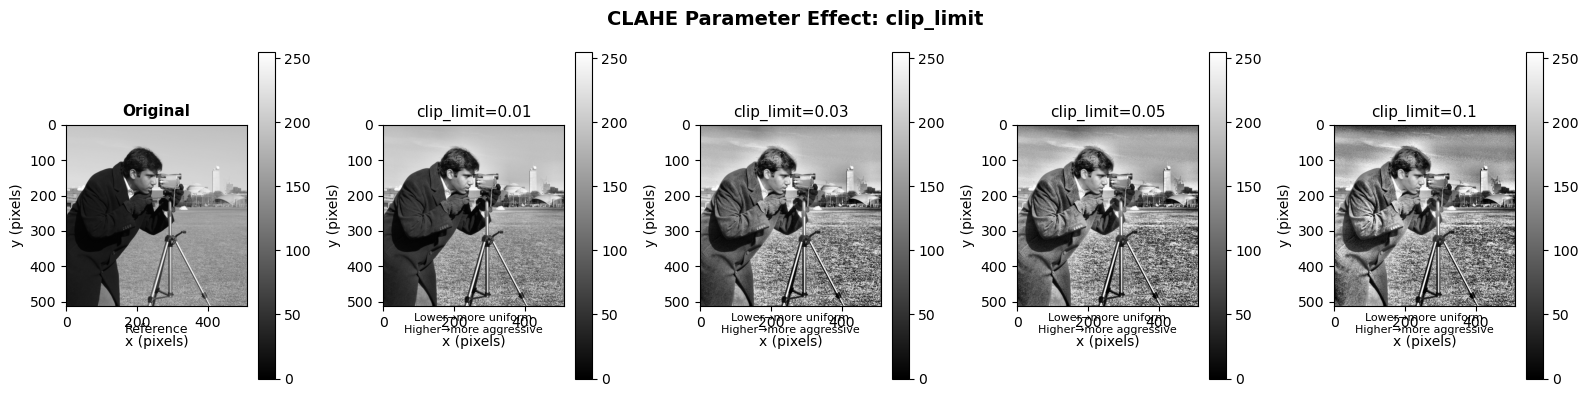


CLAHE Parameter Interpretation:
- clip_limit: Controls contrast enhancement strength
  - Lower (0.01): Conservative, preserves natural look
  - Higher (0.1+): Aggressive, enhanced contrast but possible artifacts
  - Recommended range: 0.01-0.05 for most applications


In [8]:
# Test different clip_limit values
clip_limits = [0.01, 0.03, 0.05, 0.1]
clahe_results = {}

for clip in clip_limits:
    result = exposure.equalize_adapthist(image_original, clip_limit=clip)
    clahe_results[clip] = (result * 255).astype(np.uint8)
    print(f"CLAHE with clip_limit={clip} computed")

# Visualization
fig, axes = plt.subplots(1, len(clip_limits) + 1, figsize=(16, 4))
fig.suptitle('CLAHE Parameter Effect: clip_limit', fontsize=14, fontweight='bold')

# Original
im0 = axes[0].imshow(image_original, cmap='gray')
axes[0].set_title('Original', fontsize=11, fontweight='bold')
axes[0].text(0.5, -0.15, 'Reference', transform=axes[0].transAxes, ha='center', fontsize=9)
plt.colorbar(im0, ax=axes[0])

# CLAHE with different clip_limits
for idx, clip in enumerate(clip_limits):
    im = axes[idx + 1].imshow(clahe_results[clip], cmap='gray')
    axes[idx + 1].set_title(f'clip_limit={clip}', fontsize=11)
    axes[idx + 1].text(0.5, -0.15, f'Lower→more uniform\nHigher→more aggressive', 
                      transform=axes[idx + 1].transAxes, ha='center', fontsize=8)
    plt.colorbar(im, ax=axes[idx + 1])

for ax in axes:
    ax.set_xlabel('x (pixels)')
    ax.set_ylabel('y (pixels)')

plt.tight_layout()
plt.show()

print("\nCLAHE Parameter Interpretation:")
print("- clip_limit: Controls contrast enhancement strength")
print("  - Lower (0.01): Conservative, preserves natural look")
print("  - Higher (0.1+): Aggressive, enhanced contrast but possible artifacts")
print("  - Recommended range: 0.01-0.05 for most applications")

## 7. Summary and Guidelines

### When to Use Each Method:

| Method | Pros | Cons | Best For |
|--------|------|------|----------|
| **No Enhancement** | Preserves original data | Poor visibility | Scientific record keeping |
| **Global Equalization** | Simple, fast, full contrast | Artifacts, unnatural look | Low-contrast images with uniform scene |
| **CLAHE** | Balanced, natural-looking | More computation | Most practical applications |

### For STEM/Microscopy Data:

**Typical Workflow:**
1. **Examine histogram** of raw data
2. **Try CLAHE** with clip_limit = 0.02-0.05
3. **Compare with original** to verify enhancement is meaningful
4. **Adjust parameters** if needed based on visual inspection
5. **Document enhancement** in image metadata

**Important Caveats:**
- ⚠️ Enhancement can create artifacts or mislead interpretation
- ⚠️ Always keep original data unchanged
- ⚠️ Use for visualization/analysis, not for quantitative measurements (unless carefully validated)
- ⚠️ Different enhancement can make same data look very different

**STEM-Specific Considerations:**
- Atomic column visibility often benefits from mild CLAHE
- Phase contrast in crystalline materials enhanced by CLAHE
- Domain boundaries easier to identify after enhancement
- Use standard clip_limits (0.02) for reproducibility between samples